**Problem Statement:**
The primary goal is to perform sentiment analysis, investigate temporal and geographical trends in user-generated content, and analyze platform-specific user behavior. The project will focus on identifying popular topics through hashtags, exploring engagement levels, and understanding regional differences in sentiment trends.

Dataset : https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset/code

**To-Dos:**

1. Dataset **acquisition** and initial **exploration**.

2.   **Feature Exploration**
*   Data manipulation using Numpy and Pandas.
*   Exploring the dataset.

3.  **EDA & Visualization**
*   Data manipulation using Numpy and Pandas.
*   Exploring EDA and visualization techniques.
*   Select relevant features and formulate the problem statement.

4.   Mid-Program **Presentation**: Present progress achieved till the EDA stage.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.tokenize import RegexpTokenizer
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
url = "https://raw.githubusercontent.com/Data-Dogs-NYU-DataScienceBootCamp/Datadog-DataScience-Project/main/sentimentdataset.csv"
df = pd.read_csv(url)

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


### Step 1: Data Cleaning and Pre-processing

*In this section, our goal is to understand the data and try and find any incosistencies or discrepancies by doing data analysis.*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [5]:
df.isna().sum() ## cleaning up

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df["Retweets"] = df["Retweets"].astype(int)
df["Likes"] = df["Likes"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  732 non-null    int64         
 1   Unnamed: 0    732 non-null    int64         
 2   Text          732 non-null    object        
 3   Sentiment     732 non-null    object        
 4   Timestamp     732 non-null    datetime64[ns]
 5   User          732 non-null    object        
 6   Platform      732 non-null    object        
 7   Hashtags      732 non-null    object        
 8   Retweets      732 non-null    int64         
 9   Likes         732 non-null    int64         
 10  Country       732 non-null    object        
 11  Year          732 non-null    int64         
 12  Month         732 non-null    int64         
 13  Day           732 non-null    int64         
 14  Hour          732 non-null    int64         
dtypes: datetime64[ns](1), int64(8), object(6

In [10]:
df = df.drop(columns = ["Unnamed: 0", "Unnamed: 0.1"])

In [11]:
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

In [12]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [13]:
df.tail()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20
731,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24,47,USA,2020,11,15,15


## Creating a broad spectrum sentiment groups

In [14]:

mapping = {
    # Neutral group
    'neutral': 'Neutral',
    'confusion': 'Neutral',
    'indifference': 'Neutral',
    'numbness': 'Neutral',
    'nostalgia': 'Neutral',
    'ambivalence': 'Neutral',
    'pensive': 'Neutral',

    # Positive group
    'positive': 'Positive',
    'happiness': 'Positive',
    'joy': 'Positive',
    'love': 'Positive',
    'amusement': 'Positive',
    'enjoyment': 'Positive',
    'admiration': 'Positive',
    'affection': 'Positive',
    'awe': 'Positive',
    'acceptance': 'Positive',
    'adoration': 'Positive',
    'anticipation': 'Positive',
    'calmness': 'Positive',
    'excitement': 'Positive',
    'elation': 'Positive',
    'euphoria': 'Positive',
    'contentment': 'Positive',
    'serenity': 'Positive',
    'gratitude': 'Positive',
    'hope': 'Positive',
    'empowerment': 'Positive',
    'compassion': 'Positive',
    'tenderness': 'Positive',
    'arousal': 'Positive',
    'enthusiasm': 'Positive',
    'fulfillment': 'Positive',
    'reverence': 'Positive',
    'kind': 'Positive',
    'pride': 'Positive',
    'zest': 'Positive',
    'hopeful': 'Positive',
    'grateful': 'Positive',
    'empathetic': 'Positive',
    'compassionate': 'Positive',
    'playful': 'Positive',
    'free-spirited': 'Positive',
    'inspired': 'Positive',
    'confident': 'Positive',
    'overjoyed': 'Positive',
    'inspiration': 'Positive',
    'motivation': 'Positive',
    'joyfulreunion': 'Positive',
    'satisfaction': 'Positive',
    'blessed': 'Positive',
    'appreciation': 'Positive',
    'confidence': 'Positive',
    'accomplishment': 'Positive',
    'wonderment': 'Positive',
    'optimism': 'Positive',
    'enchantment': 'Positive',
    'intrigue': 'Positive',
    'playfuljoy': 'Positive',
    'mindfulness': 'Positive',
    'dreamchaser': 'Positive',
    'elegance': 'Positive',
    'whimsy': 'Positive',
    'thrill': 'Positive',
    'harmony': 'Positive',
    'creativity': 'Positive',
    'radiance': 'Positive',
    'wonder': 'Positive',
    'rejuvenation': 'Positive',
    'coziness': 'Positive',
    'adventure': 'Positive',
    'melodic': 'Positive',
    'festivejoy': 'Positive',
    'innerjourney': 'Positive',
    'freedom': 'Positive',
    'dazzle': 'Positive',
    'adrenaline': 'Positive',
    'artisticburst': 'Positive',
    'culinaryodyssey': 'Positive',
    'spark': 'Positive',
    'marvel': 'Positive',
    'positivity': 'Positive',
    'kindness': 'Positive',
    'friendship': 'Positive',
    'success': 'Positive',
    'exploration': 'Positive',
    'amazement': 'Positive',
    'romance': 'Positive',
    'captivation': 'Positive',
    'tranquility': 'Positive',
    'grandeur': 'Positive',
    'emotion': 'Positive',
    'energy': 'Positive',
    'celebration': 'Positive',
    'charm': 'Positive',
    'ecstasy': 'Positive',
    'colorful': 'Positive',
    'hypnotic': 'Positive',
    'connection': 'Positive',
    'iconic': 'Positive',
    'journey': 'Positive',
    'engagement': 'Positive',
    'touched': 'Positive',
    'triumph': 'Positive',
    'heartwarming': 'Positive',
    'breakthrough': 'Positive',
    'joy in baking': 'Positive',
    'imagination': 'Positive',
    'vibrancy': 'Positive',
    'mesmerizing': 'Positive',
    'culinary adventure': 'Positive',
    'winter magic': 'Positive',
    'thrilling journey': 'Positive',
    "nature's beauty": 'Positive',
    'celestial wonder': 'Positive',
    'creative inspiration': 'Positive',
    'runway creativity': 'Positive',
    "ocean's freedom": 'Positive',
    'whispers of the past': 'Positive',
    'relief': 'Positive',
    'happy': 'Positive',

    # Negative group
    'negative': 'Negative',
    'anger': 'Negative',
    'fear': 'Negative',
    'sadness': 'Negative',
    'disgust': 'Negative',
    'disappointed': 'Negative',
    'bitter': 'Negative',
    'shame': 'Negative',
    'despair': 'Negative',
    'grief': 'Negative',
    'loneliness': 'Negative',
    'jealousy': 'Negative',
    'resentment': 'Negative',
    'frustration': 'Negative',
    'boredom': 'Negative',
    'anxiety': 'Negative',
    'intimidation': 'Negative',
    'helplessness': 'Negative',
    'envy': 'Negative',
    'regret': 'Negative',
    'bitterness': 'Negative',
    'yearning': 'Negative',
    'fearful': 'Negative',
    'apprehensive': 'Negative',
    'overwhelmed': 'Negative',
    'jealous': 'Negative',
    'devastated': 'Negative',
    'frustrated': 'Negative',
    'envious': 'Negative',
    'dismissive': 'Negative',
    'bittersweet': 'Negative',
    'sad': 'Negative',
    'hate': 'Negative',
    'bad': 'Negative',
    'embarrassed': 'Negative',
    'mischievous': 'Negative',  # context-dependent; adjust if needed
    'lostlove': 'Negative',
    'betrayal': 'Negative',
    'suffering': 'Negative',
    'emotionalstorm': 'Negative',
    'isolation': 'Negative',
    'disappointment': 'Negative',
    'heartbreak': 'Negative',
    'sorrow': 'Negative',
    'darkness': 'Negative',
    'desperation': 'Negative',
    'ruins': 'Negative',
    'desolation': 'Negative',
    'loss': 'Negative',
    'heartache': 'Negative',
    'obstacle': 'Negative',
    'pressure': 'Negative',
    'miscalculation': 'Negative',
    'exhaustion': 'Negative'
}

# Function to map each sentiment into a broader category
def map_sentiment(sent):
    # Clean the sentiment string (strip whitespace and convert to lower-case)
    clean_sent = sent.strip().lower()
    # Look up the sentiment in the mapping dictionary
    return mapping.get(clean_sent, 'Other')  # default to 'Other' if not found

# Apply the mapping to create a new column
df['Broad_Sentiment'] = df['Sentiment'].apply(map_sentiment)

# Display the updated DataFrame
print(df.head(10))


                                                Text Sentiment  \
0              Enjoying a beautiful day at the park!  Positive   
1                 Traffic was terrible this morning.  Negative   
2                Just finished an amazing workout! 💪  Positive   
3        Excited about the upcoming weekend getaway!  Positive   
4        Trying out a new recipe for dinner tonight.   Neutral   
5    Feeling grateful for the little things in life.  Positive   
6   Rainy days call for cozy blankets and hot cocoa.  Positive   
7             The new movie release is a must-watch!  Positive   
8  Political discussions heating up on the timeline.  Negative   
9               Missing summer vibes and beach days.   Neutral   

            Timestamp          User   Platform                   Hashtags  \
0 2023-01-15 12:30:00       User123    Twitter              #Nature #Park   
1 2023-01-15 08:45:00     CommuterX    Twitter          #Traffic #Morning   
2 2023-01-15 15:45:00    FitnessFan  Insta

**Analyzing the Categories in the fields - Country, Platform, Hashtags & User.**

In [15]:
#Computing the categories in the field: Country
# still working on this, not the final code - Shreya
countrs = [ ]
#print(len(countrs))
for index, rows in df.iterrows():
  countrs.append(rows['Country'].strip().lower())
print(len(countrs))

countries = set(countrs)
print(f'The Countries recorded in the dataset are:{countries}')
print(len(countries))

732
The Countries recorded in the dataset are:{'canada', 'austria', 'norway', 'colombia', 'jordan', 'china', 'australia', 'belgium', 'denmark', 'greece', 'uk', 'maldives', 'usa', 'peru', 'thailand', 'cambodia', 'south africa', 'kenya', 'scotland', 'czech republic', 'jamaica', 'france', 'ireland', 'germany', 'italy', 'japan', 'switzerland', 'spain', 'sweden', 'netherlands', 'india', 'portugal', 'brazil'}
33


In [16]:
#Computing the categories in the field: Platform
platf = [ ]
for index, rows in df.iterrows():
  platf.append(rows['Platform'].strip().lower())
print(len(platf))

platformss = set(platf)
print(f'The Platforms recorded in the dataset are:{platformss}')
print(len(platformss))


732
The Platforms recorded in the dataset are:{'twitter', 'facebook', 'instagram'}
3


In [17]:
#Computing the categories in the field: Hashtags
hashes = [ ]
df2 = df
df2['Hashtags'] = df2['Hashtags'].astype('string')
for index, rows in df2.iterrows():
  hwords=rows['Hashtags'].strip().lower()
  for word in hwords.split(' '):
    hashes.append(word)

print(len(hashes))
hashts = set(hashes)
print(f'The Hashtags recorded in the dataset are:{hashts}')
print(len(hashts))

1464
The Hashtags recorded in the dataset are:{'#suspense', '#contentment', '#coding', '#seniorvoices', '#highschoolweather', '#humanity', '#bikeride', '#apprehensive', '#sleepoverfun', '#vibrancy', '#amusement', '#highschoolunity', '#love', '#mjtribute', '#supportive', '#sympathy', '#classevent', '#seniorconcert', '#hopeful', '#rhythmofaffection', '#shakirarhythms', '#untoldsorrows', '#stagepassion', '#holidaysupport', '#helpingothers', '#lostfriendship', '#fulfillingending', '#classicfilmmoments', '#goldenhues', '#melodic', '#handcraftedart', '#ancientdiscovery', '#wonderment', '#cyclingfrustration', '#empowerment', '#sadnesswhirlwind', '#mindfulliving', '#paperplaneexpert', '#ancientcivilization', '#traveladventure', '#streetfooddelights', '#projectstruggles', '#sunsetmoments', '#lurkingmonsters', '#homecooking', '#confusion', '#highschooladventures', '#highschoolinterests', '#tornapart', '#supportivecommunity', '#firstdayoops', '#resentmentweb', '#standingtall', '#bitterpill', '#re

In [18]:
df2['Hashtags']

,Hashtags
0,#Nature #Park
1,#Traffic #Morning
2,#Fitness #Workout
3,#Travel #Adventure
4,#Cooking #Food
...,...
727,#ScienceFairWinner #HighSchoolScience
728,#SurpriseCelebration #HighSchoolFriendship
729,#CommunityGiving #HighSchoolPhilanthropy
730,#CulturalCelebration #HighSchoolUnity


In [19]:
sentimentss = df['Broad_Sentiment'].values
sent_categ = set(sentimentss)
print(f'No. of sentiments: {len(sent_categ)}.\nThe sentiments are classified into: {sent_categ}')

No. of sentiments: 4.
The sentiments are classified into: {'Negative', 'Other', 'Positive', 'Neutral'}


In [20]:
#User's posting-sentiment behavior - To analyze the posting activity of users, as in does a user regularly post negative comments, positive comments, etc.
user_senti_dic  = { }
for index, rows in df.iterrows():
  if rows['User'] not in user_senti_dic:
    user_senti_dic[rows['User']] = [rows['Broad_Sentiment']]
  else:
    user_senti_dic[rows['User']].append(rows['Broad_Sentiment'])

print(len(user_senti_dic))
user_senti_dic

670


{'User123': ['Positive'],
 'CommuterX': ['Negative'],
 'FitnessFan': ['Positive'],
 'AdventureX': ['Positive'],
 'ChefCook': ['Neutral'],
 'GratitudeNow': ['Positive'],
 'RainyDays': ['Positive'],
 'MovieBuff': ['Positive', 'Negative'],
 'DebateTalk': ['Negative'],
 'BeachLover': ['Neutral'],
 'BloggerX': ['Positive'],
 'WellnessCheck': ['Negative'],
 'UrbanExplorer': ['Positive'],
 'FitJourney': ['Positive'],
 'TechEnthusiast': ['Neutral'],
 'Reflections': ['Positive'],
 'PetAdopter': ['Positive'],
 'GamerX': ['Positive'],
 'TechConference': ['Neutral'],
 'WinterBlues': ['Negative'],
 'Bookworm': ['Positive', 'Positive', 'Other'],
 'VRExplorer': ['Positive'],
 'ProductivityPro': ['Positive'],
 'FitnessWarrior': ['Positive'],
 'CareerMilestone': ['Positive'],
 'BrunchBuddy': ['Positive'],
 'LanguageLearner': ['Positive'],
 'BookLover': ['Positive'],
 'MentalHealthMatters': ['Positive'],
 'ArtistInAction': ['Positive'],
 'RoadTripper': ['Positive'],
 'SunsetWatcher': ['Positive', 'Posit

## Step 2: Tokenization and Lemmization



In [25]:
df['Text'] = df['Text'].str.lower() # convert to lowercase
df['Text'] = df['Text'].str.replace(r'@\w+', '', regex=True) # removes @
df['Text'] = df['Text'].str.replace(r'http\S+|www\S+', '', regex=True) # removes url
df['Text'] = df['Text'].str.replace('[{}]'.format(string.punctuation), '', regex=True) #removes punctuations
df['Text'] = df['Text'].str.replace('\d+', '', regex=True) # remove digits.

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Tokens'] = df['Tokens'].apply(remove_stopwords)


In [26]:
tokenizer = RegexpTokenizer(r'\w+')
df['Tokens'] = df['Text'].apply(tokenizer.tokenize)

In [27]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['Tokens'] = df['Tokens'].apply(remove_stopwords)


In [28]:
df['Tokens']

,Tokens
0,"[enjoying, beautiful, day, park]"
1,"[traffic, terrible, morning]"
2,"[finished, amazing, workout]"
3,"[excited, upcoming, weekend, getaway]"
4,"[trying, new, recipe, dinner, tonight]"
...,...
727,"[collaborating, science, project, received, re..."
728,"[attending, surprise, birthday, party, organiz..."
729,"[successfully, fundraising, school, charity, i..."
730,"[participating, multicultural, festival, celeb..."


In [29]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

df['Tokens'] = df['Tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['Tokens'] = df['Tokens'].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [31]:
df['Cleaned_Text'] = df['Tokens'].apply(lambda tokens: ' '.join(tokens))
df['Cleaned_Text']

,Cleaned_Text
0,enjoying beautiful day park
1,traffic terrible morning
2,finished amazing workout
3,excited upcoming weekend getaway
4,trying new recipe dinner tonight
...,...
727,collaborating science project received recogni...
728,attending surprise birthday party organized fr...
729,successfully fundraising school charity initia...
730,participating multicultural festival celebrati...


### Step 3: Basic data visualization (plotly)

## Social Engagement Dynamics - Heatmap

A heatmap can help you see the relationships among numerical features. In your dataset, you might look at how "Retweets", "Likes", and even "Hour" (if it’s meaningful) correlate with one another.

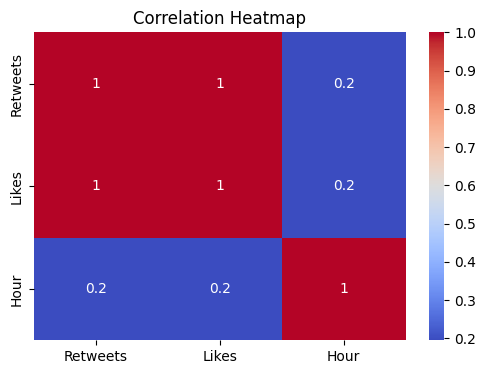

In [32]:
numeric_cols = ['Retweets', 'Likes', 'Hour']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Scatter Plot: Retweets vs Likes by Sentiment
A scatter plot can reveal if there is any pattern between the number of retweets and likes. Coloring by sentiment can add an extra layer of insight.

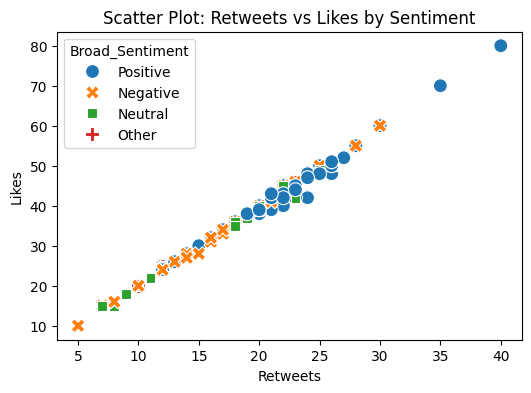

In [33]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Retweets', y='Likes', hue='Broad_Sentiment', style='Broad_Sentiment', s=100)
plt.title("Scatter Plot: Retweets vs Likes by Sentiment")
plt.xlabel("Retweets")
plt.ylabel("Likes")
plt.legend(title='Broad_Sentiment')
plt.show()


## Bar Plot -

Understanding how sentiment varies across different platforms (Twitter, Instagram, Facebook) can be insightful.

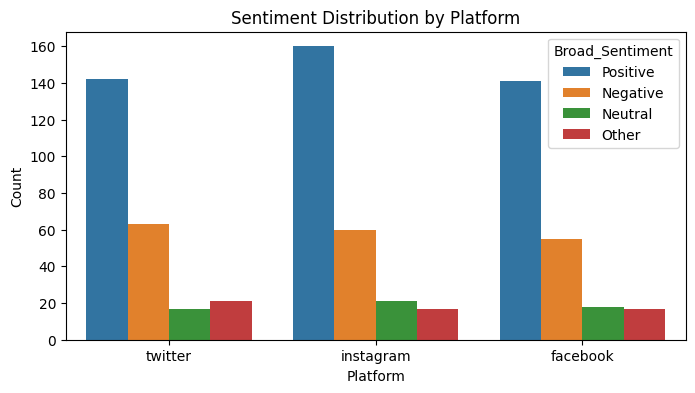

In [34]:
##Adrian
df['Platform'] = df['Platform'].str.strip().str.lower()


plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Platform', hue='Broad_Sentiment')
plt.title("Sentiment Distribution by Platform")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.legend(title='Broad_Sentiment')
plt.show()


## Time Series

the activity trend during the day, you can plot the number of tweets or posts by hour. This could be a bar chart or even a line plot.

<ipython-input-35-983d56587df9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_counts, x='Hour', y='Count', palette="viridis")


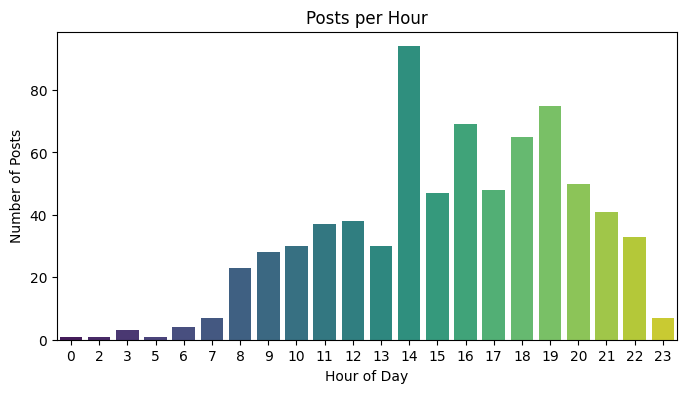

In [35]:
# Count posts per hour
hourly_counts = df.groupby('Hour').size().reset_index(name='Count')

plt.figure(figsize=(8, 4))
sns.barplot(data=hourly_counts, x='Hour', y='Count', palette="viridis")
plt.title("Posts per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Posts")
plt.show()


## Word Cloud (Hashtags)

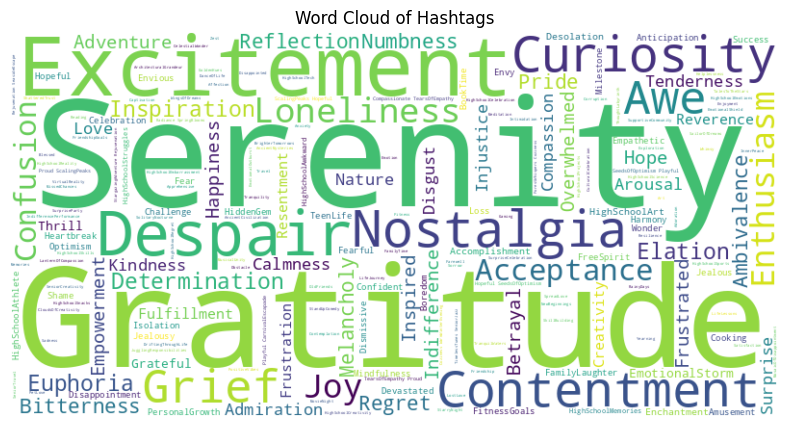

In [36]:
all_hashtags = ' '.join(df['Hashtags'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()

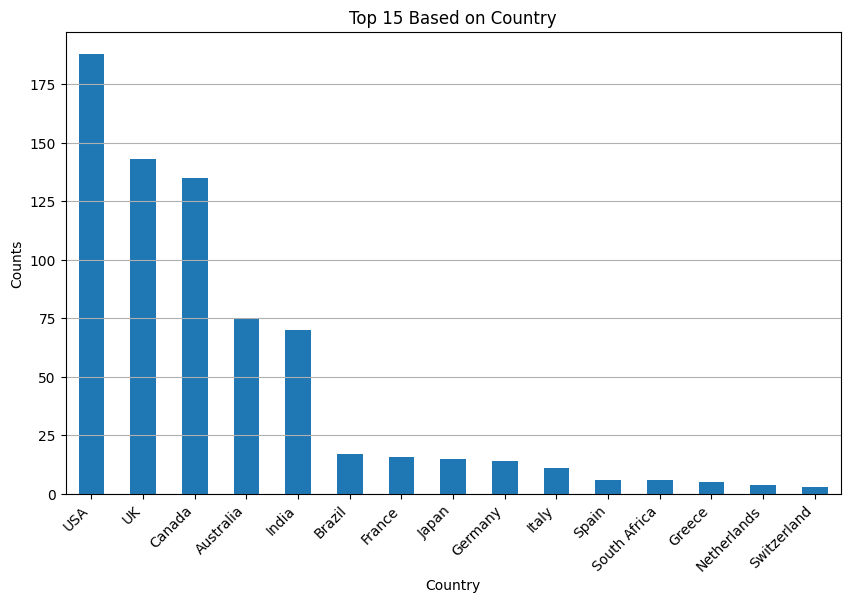

In [37]:
top_fifteen = df['Country'].value_counts().nlargest(15)

plt.figure(figsize= (10,6))
plt.title('Top 15 Based on Country')
top_fifteen.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()